## 岭回归，Lasso 回归和感知机

In [6]:
#导包
from sklearn.linear_model import LinearRegression as LR,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as feth
import pandas as pd
import numpy as np

#获取数据
housevalue = feth()
X =  pd.DataFrame(housevalue.data)
X.head()
y = housevalue.target
housevalue.feature_names
X.columns =housevalue.feature_names

#划分训练集和测试集
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size = 0.3,random_state = 420)
Xtrain.shape
Xtest.shape

# 线性回归
reg = LR().fit(Xtrain,Ytrain)
# 岭回归
reg = Ridge(alpha=100).fit(Xtrain,Ytrain) #alpha为正则项系数，等于0相当于没有惩罚，和线性回归一样的
# Lasso回归
lasso_ = Lasso(alpha=0.1).fit(Xtrain,Ytrain) #alpha的变化对模型很敏感

yhat = reg.predict(Xtest) #接口 预测值

In [7]:
Xtrain

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17073,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
16956,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
20012,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
13072,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
8457,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35
...,...,...,...,...,...,...,...,...
10394,4.7981,16.0,6.408537,1.067073,1003.0,3.057927,33.54,-117.67
1209,2.3816,16.0,6.055954,1.120516,1516.0,2.175036,38.15,-120.46
14254,1.7500,25.0,3.912500,1.029167,1003.0,4.179167,32.71,-117.10
19059,3.5647,33.0,5.423358,1.058394,781.0,2.850365,38.22,-122.49


In [11]:
type(Ytrain)

numpy.ndarray

In [10]:
type(Xtrain)

pandas.core.frame.DataFrame

---
### 感知机

In [12]:
from sklearn.datasets import make_classification
 
x,y = make_classification(n_samples=1000, n_features=2,n_redundant=0,n_informative=1,n_clusters_per_class=1)
 
#n_samples:生成样本的数量
 
#n_features=2:生成样本的特征数，特征数=n_informative（） + n_redundant + n_repeated
 
#n_informative：多信息特征的个数
 
#n_redundant：冗余信息，informative特征的随机线性组合
 
#n_clusters_per_class ：某一个类别是由几个cluster构成的 

In [14]:
x.shape

(1000, 2)

In [17]:
y.shape

(1000,)

In [18]:

#训练数据和测试数据
x_data_train = x[:800,:]
x_data_test = x[800:,:]
y_data_train = y[:800]
y_data_test = y[800:]
 
#正例和反例
positive_x1 = [x[i,0] for i in range(1000) if y[i] == 1]
positive_x2 = [x[i,1] for i in range(1000) if y[i] == 1]
negetive_x1 = [x[i,0] for i in range(1000) if y[i] == 0]
negetive_x2 = [x[i,1] for i in range(1000) if y[i] == 0]

In [21]:
from sklearn.linear_model import Perceptron
Perceptron
clf = Perceptron(fit_intercept=False,max_iter=30,shuffle=False)
#使用训练数据进行训练
clf.fit(x_data_train,y_data_train)
#得到训练结果，权重矩阵
print(clf.coef_)
#输出为：[[-0.38478876,4.41537463]]
 
#超平面的截距，此处输出为：[0.]
print(clf.intercept_)

[[-0.21594298  0.84506289]]
[0.]


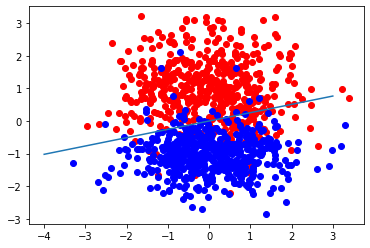

In [23]:
from matplotlib import pyplot as plt
#画出正例和反例的散点图
plt.scatter(positive_x1,positive_x2,c='red')
plt.scatter(negetive_x1,negetive_x2,c='blue')
#画出超平面（在本例中即是一条直线）
line_x = np.arange(-4,4)
line_y = line_x * (-clf.coef_[0][0] / clf.coef_[0][1]) - clf.intercept_
plt.plot(line_x,line_y)
plt.show()

In [1]:
import pandas as pd
import numpy as np
sheet = pd.read_excel('example2.xlsx')
sheet

,Hmix,Smix,Phase
0,-5.09,5.22,1
1,-1.86,3.80,1
2,-3.49,4.31,1
3,-11.44,7.84,1
4,-5.00,4.31,1
5,-3.37,4.97,1
6,-4.02,5.48,1
7,-2.47,4.86,1
8,2.20,4.30,1
9,-29.15,7.63,1


In [2]:
hmix = sheet['Hmix'].to_numpy()
smix = sheet['Smix'].to_numpy()
hmix.shape, smix.shape

((34,), (34,))

In [3]:
x = np.dstack((hmix, smix))[0]
x.shape

(34, 2)

In [4]:
y = sheet['Phase'].to_numpy()
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
length = len(hmix)
positive_x1 = [x[i,0] for i in range(length) if y[i] == 1]
positive_x2 = [x[i,1] for i in range(length) if y[i] == 1]
negative_x1 = [x[i,0] for i in range(length) if y[i] == 0]
negative_x2 = [x[i,1] for i in range(length) if y[i] == 0]

In [6]:
from sklearn.linear_model import Perceptron
Perceptron
clf = Perceptron(fit_intercept=False,max_iter=300,shuffle=False)
#使用训练数据进行训练
clf.fit(x, y)
#得到训练结果，权重矩阵
print(clf.coef_)
#输出为：[[-0.38478876,4.41537463]]
 
#超平面的截距，此处输出为：[0.]
print(clf.intercept_)

[[17.64 32.7 ]]
[0.]


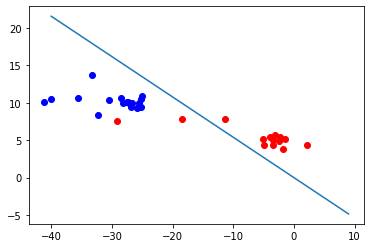

In [11]:
from matplotlib import pyplot as plt
#画出正例和反例的散点图
plt.scatter(positive_x1,positive_x2,c='red')
plt.scatter(negative_x1,negative_x2,c='blue')
#画出超平面（在本例中即是一条直线）
line_x = np.arange(-40,10)
line_y = line_x * (-clf.coef_[0][0] / clf.coef_[0][1]) - clf.intercept_
plt.plot(line_x,line_y)
plt.show()